# 基础

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from utils import hist_point
from pandas.api.types import CategoricalDtype


: 

In [6]:
plt.rc('font', family='Times New Roman')  # Set Font

In [9]:
"""不同数据分布的统计直方图分析"""
df = pd.read_csv('Distribution_Data.csv')
df.head()

,class,value
0,n,3.918358
1,n,2.556974
2,n,5.834538
3,n,2.255196
4,n,4.443104


findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


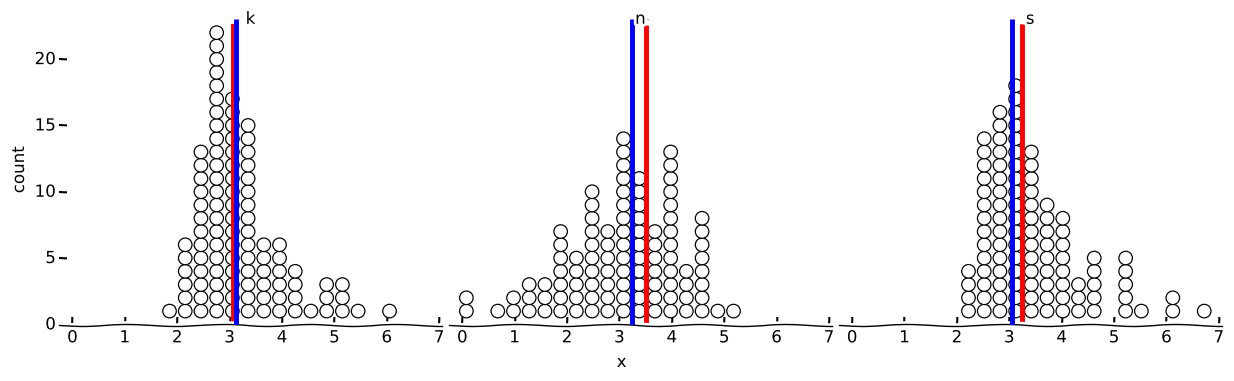

/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 15 x 15 in image.
/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 简单统计函数.pdf


In [12]:
# class 列从字符串变为类别
df['class'] = df['class'].astype(CategoricalDtype(categories=["n", "s", "k", "mm"], ordered=True))
# 创建一个新的 df
df_all = pd.DataFrame(columns=['x', 'count', 'group'])
mean = []
median = []
group = ["n", "s", "k"]
for i in group:
    value = df.loc[df['class'] == i, 'value'].values  # np.random.normal(loc=5,scale=1,size=150)
    df_temp = hist_point(value)
    df_temp['group'] = i
    df_all = df_all.append(df_temp)

    mean.append(np.mean(value))
    median.append(np.median(value))

df_line = pd.DataFrame(dict(mean=mean, median=median, group=group))
df_all['count'] = df_all['count'].astype(int)

base_plot = (ggplot()
             + geom_point(df_all, aes(x='x', y='count'), shape='o', size=5, color='k', fill='w')
             # +geom_density(df0,aes(x='x'),position = "stack",size=1,color='k',fill='none')
             + geom_vline(df_line, aes(xintercept=mean), colour='r', size=2)
             + geom_vline(df_line, aes(xintercept=median), colour='b', size=2)
             + scale_x_continuous(breaks=np.arange(0, 8, 1))
             + facet_wrap('~group')
             + theme_xkcd()
             + theme(  # panel_background=element_rect(color="none"),
            strip_background=element_blank(),
            panel_border=element_line(color="none"),
            axis_line_x=element_line(color="k"),
            text=element_text(size=12, colour="black"),
            aspect_ratio=0.8,
            dpi=100,
            figure_size=(15, 15))
             )

print(base_plot)
base_plot.save('简单统计函数.pdf')